In [21]:

import torch
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from datasetUtils import load_from_Jadson
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay


#carregando labels

labels_teste = np.load("resultados/labels_test.npy")
labels_validation = np.load("resultados/labels_validation.npy")

print("tamanho de labels_teste: " + str(len(labels_teste)))
print("tamanho de labels_validation: " + str(len(labels_validation)))
#corregando dados

features_teste = torch.load("resultados/test.pt")
features_validation = torch.load("resultados/validation.pt")

print("tamanho de features_teste: " + str(features_teste.size()))
print("tamanho de features_validation: " + str(features_validation.size()))


tamanho de labels_teste: 24000
tamanho de labels_validation: 9600
tamanho de features_teste: torch.Size([24000, 2048])
tamanho de features_validation: torch.Size([9600, 2048])


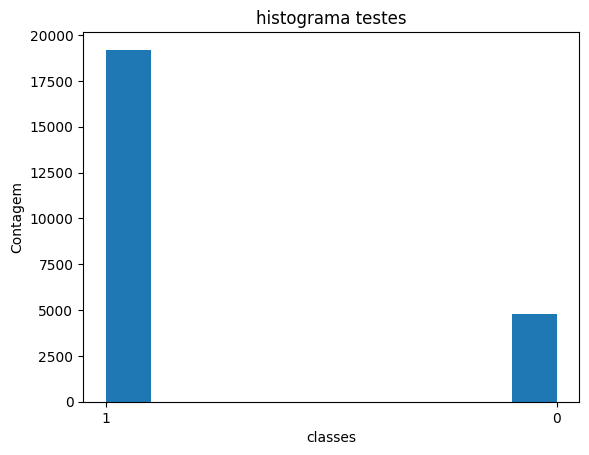

In [22]:

data = labels_teste
plt.hist(data)
plt.title("histograma testes")
plt.xlabel("classes")
plt.ylabel("Contagem")
plt.show()


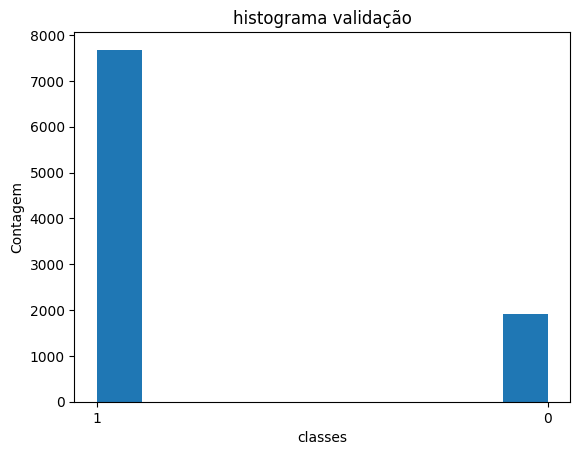

In [23]:

data = labels_validation
plt.hist(data)
plt.title("histograma validação")
plt.xlabel("classes")
plt.ylabel("Contagem")
plt.show()


/home/emorais/miniconda3/envs/myenv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


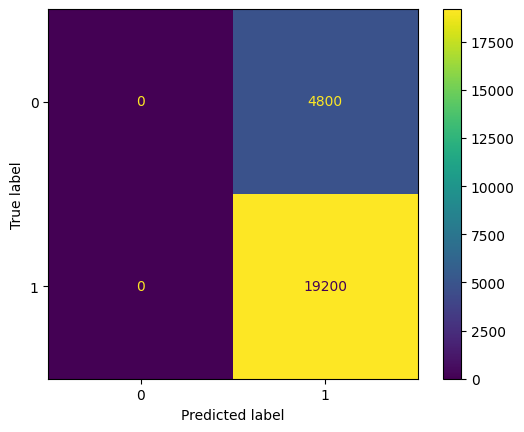

[1 1 1 ... 0 0 0]
[1 1 1 ... 1 1 1]
Acurácia: 0.8
Precisão: 0.8
Recall: 1.0
F1-Score: 0.888888888888889


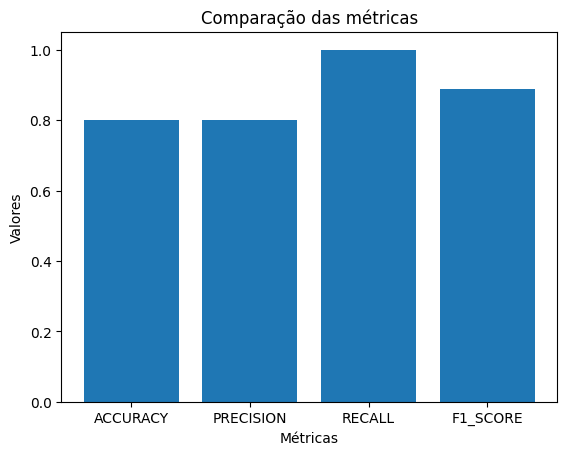

/home/emorais/miniconda3/envs/myenv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


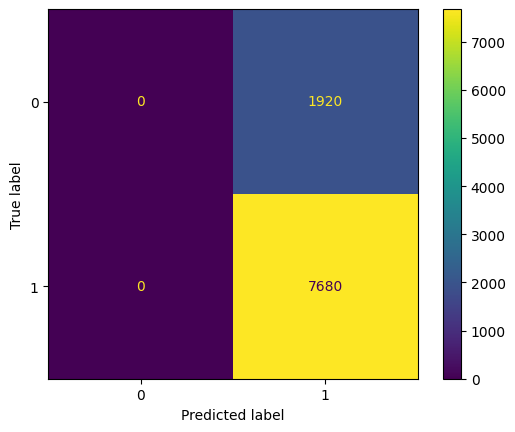

[1 1 1 ... 0 0 0]
[1 1 1 ... 1 1 1]
Acurácia: 0.8
Precisão: 0.8
Recall: 1.0
F1-Score: 0.888888888888889


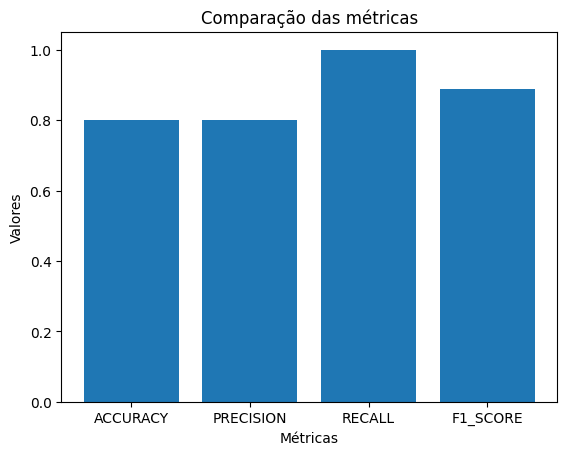

In [24]:

base_name_dir = "/hadatasets/Synthetic-Realities/20-spoofing-mpad/2020-plosone-recod-mpad"

def calc_predito(clusters, features, labels_ground_truth):
    
    kmeans = KMeans(n_clusters=clusters)
    kmeans.fit(features)
    labels_kmt = kmeans.labels_

    predito = np.zeros(len(labels_ground_truth), dtype=int)
    for k in range(clusters):
        contagem = np.zeros(clusters, dtype=int)
        # para cada i em labels_kmt
        for indice, (el1,el2) in enumerate(zip(labels_kmt, labels_ground_truth)):
            if el1 == k: 
                contagem[int(el2)] +=1
        max = np.argmax(contagem)
        
        for indice, (el1,el2) in enumerate(zip(labels_kmt, labels_ground_truth)):
            if el1 == k:
                predito[indice] = int(max)
                
    return predito 

def medidas(GT, predito):
    y_true = GT
    y_pred = predito
    confusion = confusion_matrix(GT, predito)
    
    
    disp = ConfusionMatrixDisplay(confusion)
    disp.plot()
    plt.show()

    
    from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
    # calculando as métricas iniciais
    # # Calcular a acurácia (Accuracy)
    accuracy = accuracy_score(y_true, y_pred)
    
    
    # Calcular a precisão (Precision)
    precision = precision_score(y_true, y_pred)
    
    # Calcular o recall (Sensibilidade)
    recall = recall_score(y_true, y_pred)
     
    # Calcular o F1-Score
    f1_score = f1_score(y_true, y_pred)
    
    TP = confusion[0,0]
    FN = confusion[0,1]
    FP = confusion[1,0]
    TN = confusion[1,1]
    
    # # Calcular o APCER
    # APCER = FN / (TP + FN)
         
    # # Calcular o BPCER
    # BPCER = FP / (TN + FP)
    
    return [accuracy, precision, recall, f1_score], ['ACCURACY', 'PRECISION', 'RECALL', 'F1_SCORE'] #incluir APCER e BPCER
    
def desenha_metricas(GT, features, labels_ground_truth):
    
    #predito = calc_predito(clusters=2,features=features_teste,labels_ground_truth=labels_teste)
    #rotulos, metricas = medidas(GT=GT,predito=predito)
    
    predito = calc_predito(clusters=2,features=features,labels_ground_truth=labels_ground_truth)
    metricas, rotulos = medidas(GT=GT,predito=predito)
    
    print(GT)
    print(predito)

    accuracy  = metricas[0]
    precision = metricas[1]
    recall    = metricas[2]
    f1_score  = metricas[3]
    #APCER     = metricas[4]
    #BPCER     = metricas[5]


    print(f'Acurácia: {accuracy}')
    print(f'Precisão: {precision}')
    print(f'Recall: {recall}')
    print(f'F1-Score: {f1_score}')
    # print(f'APCER: {APCER}')
    # print(f'BPCER: {BPCER}') 

    # Criar o gráfico de barras
    plt.bar(rotulos, metricas)

    # Adicionar rótulos e título
    plt.xlabel("Métricas")
    plt.ylabel("Valores")
    plt.title("Comparação das métricas")

    # Exibir o gráfico
    plt.show()
    
    return 

GT = load_from_Jadson("csvs/test_motog5.csv", base_name_dir)
GT = np.array([ int(item[1]) for item in GT])
desenha_metricas(GT=GT, features=features_teste, labels_ground_truth=labels_teste)

GT = load_from_Jadson("csvs/val_motog5.csv", base_name_dir)
GT = np.array([ int(item[1]) for item in GT])
desenha_metricas(GT=GT, features=features_validation, labels_ground_truth=labels_validation)

